# Regression Problem from Case and Cost Prediction using Random Forest

Nama Kelompok 5 : 
* Ignatia Hutagalung			12S19043
* Dwita Sihombing			12S19055
* Putri Yohana Rajagukguk		12S19056

# Data Understanding

Mengumpulkan Data

In [1]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
casecostprediction = pd.read_csv("./case_cost_prediction_train.csv")


- Output dibawah merupakan output yang dihasilkan berdasarkan data sebelum dilakukan drop feature. Jadi masih data original

Menelaah Data

In [3]:
casecostprediction

,row_id,tglpelayanan,kddati2,tkp,peserta,a,b,c,cb,d,...,kp,kt,ku,s,sa,sb,sc,sd,case,unit_cost
0,1,2014-04-01 00:00:00,332,40,179530,0,0,1,0,1,...,0,0,0,0,0,0,0,0,266,3.597440e+06
1,2,2016-11-01 00:00:00,54,40,104782,0,1,0,0,0,...,0,0,1,0,0,0,1,1,2453,4.951008e+06
2,3,2016-05-01 00:00:00,323,30,280645,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1690,1.984208e+05
3,4,2018-11-01 00:00:00,318,40,178685,0,1,0,0,0,...,0,0,0,0,0,0,0,3,1321,4.008756e+06
4,5,2019-10-01 00:00:00,150,30,1199321,1,0,1,0,0,...,1,0,0,0,0,1,0,5,73056,3.072272e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57966,57967,2019-03-01 00:00:00,241,40,157213,0,0,1,0,0,...,0,0,0,0,0,0,0,0,410,3.443332e+06
57967,57968,2019-09-01 00:00:00,338,30,402173,0,0,1,0,0,...,0,0,0,0,0,0,0,0,8272,2.128621e+05
57968,57969,2016-06-01 00:00:00,241,40,99401,0,0,1,0,0,...,0,0,0,0,0,0,0,0,294,3.028611e+06
57969,57970,2018-01-01 00:00:00,147,40,509495,0,0,1,0,0,...,0,0,0,0,0,0,2,0,1983,3.629365e+06


In [4]:
casecostprediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57971 entries, 0 to 57970
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   row_id        57971 non-null  int64  
 1   tglpelayanan  57971 non-null  object 
 2   kddati2       57971 non-null  int64  
 3   tkp           57971 non-null  int64  
 4   peserta       57971 non-null  int64  
 5   a             57971 non-null  int64  
 6   b             57971 non-null  int64  
 7   c             57971 non-null  int64  
 8   cb            57971 non-null  int64  
 9   d             57971 non-null  int64  
 10  ds            57971 non-null  int64  
 11  gd            57971 non-null  int64  
 12  hd            57971 non-null  int64  
 13  i1            57971 non-null  int64  
 14  i2            57971 non-null  int64  
 15  i3            57971 non-null  int64  
 16  i4            57971 non-null  int64  
 17  kb            57971 non-null  int64  
 18  kc            57971 non-nu

Analisis Data

In [5]:
numerical_vars = ['row_id', 'tglpelayanan', 'kddati2', 'peserta','a', 'b', 'c', 'cb', 'd', 'ds', 'gd', 'hd', 'i1', 'i2', 'i3', 'i4', 'kb', 'kc', 'kg', 'kj', 'kk', 'km', 'ko', 'kp', 'kt', 'ku', 's', 'sa', 'sb', 'sc', 'sd', 'case', 'unit_cost']

In [6]:
casecostprediction.columns

Index(['row_id', 'tglpelayanan', 'kddati2', 'tkp', 'peserta', 'a', 'b', 'c',
       'cb', 'd', 'ds', 'gd', 'hd', 'i1', 'i2', 'i3', 'i4', 'kb', 'kc', 'kg',
       'ki', 'kj', 'kk', 'kl', 'km', 'ko', 'kp', 'kt', 'ku', 's', 'sa', 'sb',
       'sc', 'sd', 'case', 'unit_cost'],
      dtype='object')

In [7]:
casecostprediction.shape

(57971, 36)

Memvalidasi Data

- Pada tahap validasi data ini akan dilakukan drop feature feature yang tidak relevan dari data yang akan digunakan dalam menyelesaikan proyek ini.

In [8]:
casecostprediction = casecostprediction.drop(['row_id', 'a', 'b', 'c', 'cb', 'd', 'ds', 'gd', 'hd', 'i1', 'i2', 'i3', 'i4', 'kb', 'kc', 'kg', 'ki', 'kj', 'kk', 'kl', 'km', 'ko', 'kp', 'kt', 'ku', 's', 'sa', 'sb','sc', 'sd'],axis=1)
print(casecostprediction)


              tglpelayanan  kddati2  tkp  peserta   case     unit_cost
0      2014-04-01 00:00:00      332   40   179530    266  3.597440e+06
1      2016-11-01 00:00:00       54   40   104782   2453  4.951008e+06
2      2016-05-01 00:00:00      323   30   280645   1690  1.984208e+05
3      2018-11-01 00:00:00      318   40   178685   1321  4.008756e+06
4      2019-10-01 00:00:00      150   30  1199321  73056  3.072272e+05
...                    ...      ...  ...      ...    ...           ...
57966  2019-03-01 00:00:00      241   40   157213    410  3.443332e+06
57967  2019-09-01 00:00:00      338   30   402173   8272  2.128621e+05
57968  2016-06-01 00:00:00      241   40    99401    294  3.028611e+06
57969  2018-01-01 00:00:00      147   40   509495   1983  3.629365e+06
57970  2016-09-01 00:00:00      204   30   770169  16679  2.956852e+05

[57971 rows x 6 columns]


- Atribut Utama

In [9]:
casecostprediction['case'].describe()

count     57971.000000
mean       6539.418451
std       17607.280021
min           1.000000
25%         424.000000
50%        1359.000000
75%        4583.000000
max      333441.000000
Name: case, dtype: float64

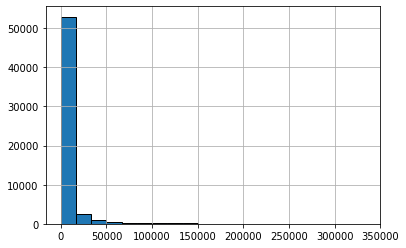

In [10]:
casecostprediction['case'].hist(edgecolor='black', bins=20);

In [11]:
casecostprediction['unit_cost'].describe()

count    5.797100e+04
mean     1.961092e+06
std      1.889367e+06
min      1.000000e+05
25%      2.336742e+05
50%      6.547994e+05
75%      3.531702e+06
max      2.690550e+07
Name: unit_cost, dtype: float64

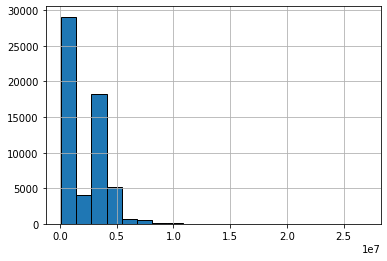

In [12]:
casecostprediction['unit_cost'].hist(edgecolor='black', bins=20);

In [13]:
casecostprediction['kddati2'].describe()

count    57971.000000
mean       246.423125
std        143.447935
min          1.000000
25%        125.000000
50%        243.000000
75%        362.000000
max        528.000000
Name: kddati2, dtype: float64

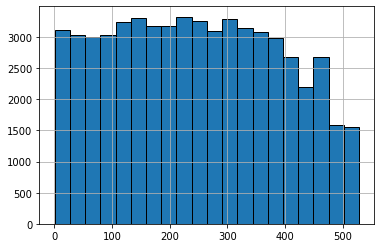

In [14]:
casecostprediction['kddati2'].hist(edgecolor='black', bins=20);

In [15]:
casecostprediction['peserta'].describe()

count    5.797100e+04
mean     3.562209e+05
std      4.120323e+05
min      8.000000e+00
25%      1.127735e+05
50%      1.975800e+05
75%      4.386935e+05
max      3.328509e+06
Name: peserta, dtype: float64

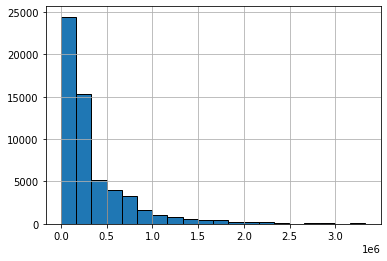

In [16]:
casecostprediction['peserta'].hist(edgecolor='black', bins=20);

In [17]:
casecostprediction['tkp'].describe()

count    57971.000000
mean        34.990081
std          5.000033
min         30.000000
25%         30.000000
50%         30.000000
75%         40.000000
max         40.000000
Name: tkp, dtype: float64

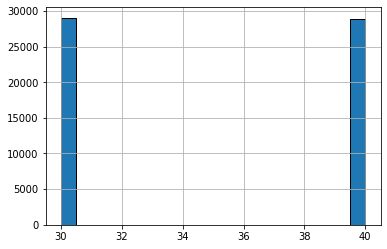

In [18]:
casecostprediction['tkp'].hist(edgecolor='black', bins=20);

In [19]:
casecostprediction['tglpelayanan'].describe()

count                   57971
unique                     90
top       2017-07-01 00:00:00
freq                      715
Name: tglpelayanan, dtype: object

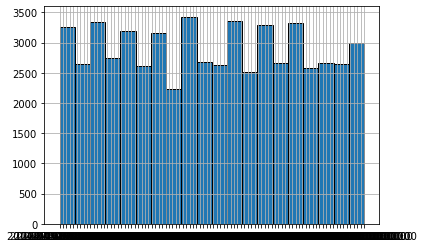

In [20]:
casecostprediction['tglpelayanan'].hist(edgecolor='black', bins=20);

- Kesimpulan yang dapat diambil dari atribut utama adalah bahwa pada tglpelayanan (2014-04-01 00:00:00) masih bertype object, sehingga ini perlu diubah menjadi nilai angka untuk memudahkan 

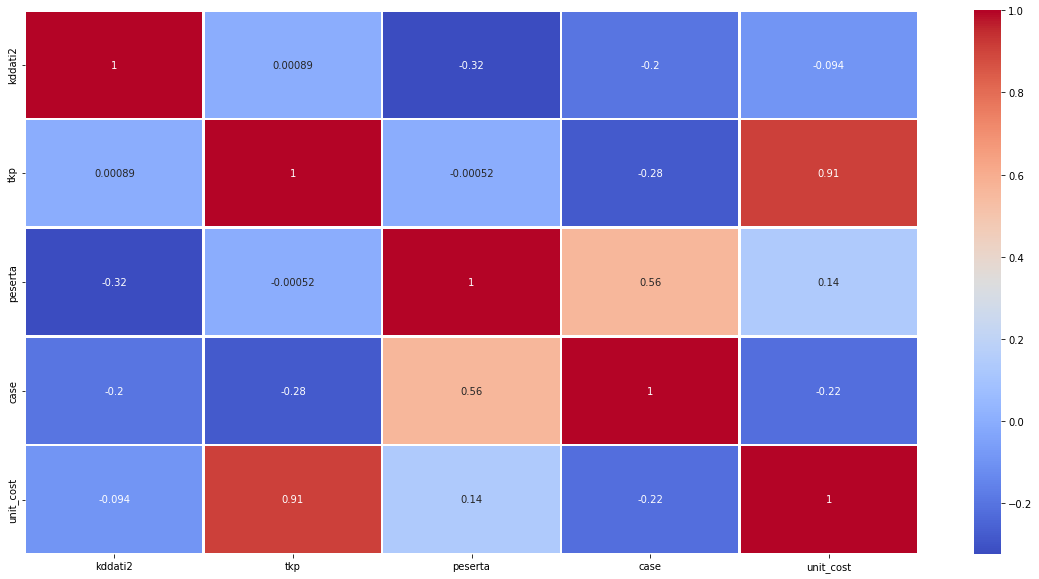

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(casecostprediction.corr(), annot=True, linewidth = 1.5, cmap='coolwarm')


# DATA PREPARATION

Memilah Data

- Setelah feature-feature yang didrop sebelumnya, sehingga dihasilkanlah data dengan feature tglpelayanan, kddati2, tkp, peserta, case dan unit_cost
- kemudian memilah data pada data preparation kami mengecek missing value 

In [22]:
casecostprediction.isnull()

,tglpelayanan,kddati2,tkp,peserta,case,unit_cost
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
57966,False,False,False,False,False,False
57967,False,False,False,False,False,False
57968,False,False,False,False,False,False
57969,False,False,False,False,False,False


- False = tidak terdapat missing value True = mengandung missing value, sehingga dari output dapat kita ketahui jika data tidak memiliki missing value.
- untuk data cleaning telah dihasilkan data tanpa missing value sehingga bernilai null

In [23]:
casecostprediction.isnull().sum()

tglpelayanan    0
kddati2         0
tkp             0
peserta         0
case            0
unit_cost       0
dtype: int64

In [24]:
casecostprediction.nunique()

tglpelayanan       90
kddati2           490
tkp                 2
peserta         36517
case            15332
unit_cost       57945
dtype: int64

# Mengkonstruksi Data

- Berdasarkan telaah data yang telah dilakukan sebelumnya, diketahui tidak ada data numerik. Namun pada data atribute tanggal pelayanan diperlukan transformasi mengubah tanggal jadi angka yang akan dilakukan menggunakan label encoding

In [25]:
casecostprediction

,tglpelayanan,kddati2,tkp,peserta,case,unit_cost
0,2014-04-01 00:00:00,332,40,179530,266,3.597440e+06
1,2016-11-01 00:00:00,54,40,104782,2453,4.951008e+06
2,2016-05-01 00:00:00,323,30,280645,1690,1.984208e+05
3,2018-11-01 00:00:00,318,40,178685,1321,4.008756e+06
4,2019-10-01 00:00:00,150,30,1199321,73056,3.072272e+05
...,...,...,...,...,...,...
57966,2019-03-01 00:00:00,241,40,157213,410,3.443332e+06
57967,2019-09-01 00:00:00,338,30,402173,8272,2.128621e+05
57968,2016-06-01 00:00:00,241,40,99401,294,3.028611e+06
57969,2018-01-01 00:00:00,147,40,509495,1983,3.629365e+06


In [26]:
#merubah nilai tglpelayanan dengan label encoding
from sklearn.preprocessing import LabelEncoder

In [27]:
encoder = LabelEncoder()

In [28]:
casecostprediction['tglpelayanan'] = encoder.fit_transform(casecostprediction['tglpelayanan'])

In [29]:
casecostprediction

,tglpelayanan,kddati2,tkp,peserta,case,unit_cost
0,3,332,40,179530,266,3.597440e+06
1,34,54,40,104782,2453,4.951008e+06
2,28,323,30,280645,1690,1.984208e+05
3,58,318,40,178685,1321,4.008756e+06
4,69,150,30,1199321,73056,3.072272e+05
...,...,...,...,...,...,...
57966,62,241,40,157213,410,3.443332e+06
57967,68,338,30,402173,8272,2.128621e+05
57968,29,241,40,99401,294,3.028611e+06
57969,48,147,40,509495,1983,3.629365e+06


- berdasarkan output dapat kita perhatikan tglpelayanan diubah menjadi angka

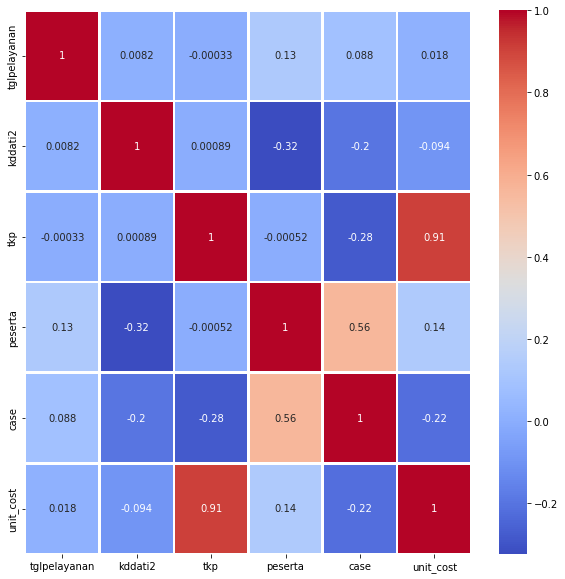

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(casecostprediction.corr(), annot=True, linewidth = 1.5, cmap='coolwarm')

# Menentukan Label Data

Proses melabeli data merupakan bagian integral dari alur kerja persiapan data dalam membangun model. Dalam case data BPJS Hackathon kedua kategori harus dibagi menjadi data training dan data validation berbeda, untuk Regression problem:

- Kasus kunjungan(Case): MAE < 900, MAPE<90%
- Biaya(Unit_cost): MAE<97000, MAPE<70%

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
casecostprediction.corr

<bound method DataFrame.corr of        tglpelayanan  kddati2  tkp  peserta   case     unit_cost
0                 3      332   40   179530    266  3.597440e+06
1                34       54   40   104782   2453  4.951008e+06
2                28      323   30   280645   1690  1.984208e+05
3                58      318   40   178685   1321  4.008756e+06
4                69      150   30  1199321  73056  3.072272e+05
...             ...      ...  ...      ...    ...           ...
57966            62      241   40   157213    410  3.443332e+06
57967            68      338   30   402173   8272  2.128621e+05
57968            29      241   40    99401    294  3.028611e+06
57969            48      147   40   509495   1983  3.629365e+06
57970            32      204   30   770169  16679  2.956852e+05

[57971 rows x 6 columns]>

In [33]:
# melabeli data training dan data evaluation

X = casecostprediction[['tglpelayanan', 'kddati2', 'tkp', 'unit_cost']]
y = casecostprediction[['peserta', 'case']]


# Mengintegrasikan Data

In [34]:
print(casecostprediction)

       tglpelayanan  kddati2  tkp  peserta   case     unit_cost
0                 3      332   40   179530    266  3.597440e+06
1                34       54   40   104782   2453  4.951008e+06
2                28      323   30   280645   1690  1.984208e+05
3                58      318   40   178685   1321  4.008756e+06
4                69      150   30  1199321  73056  3.072272e+05
...             ...      ...  ...      ...    ...           ...
57966            62      241   40   157213    410  3.443332e+06
57967            68      338   30   402173   8272  2.128621e+05
57968            29      241   40    99401    294  3.028611e+06
57969            48      147   40   509495   1983  3.629365e+06
57970            32      204   30   770169  16679  2.956852e+05

[57971 rows x 6 columns]


In [35]:
row_concat = pd.concat([casecostprediction])

In [36]:
print(row_concat.iloc[3,])

tglpelayanan    5.800000e+01
kddati2         3.180000e+02
tkp             4.000000e+01
peserta         1.786850e+05
case            1.321000e+03
unit_cost       4.008756e+06
Name: 3, dtype: float64


In [37]:
new_row_series = pd.Series(['n1', 'n2', 'n3', 'n4'])
print(new_row_series)

0    n1
1    n2
2    n3
3    n4
dtype: object


In [38]:
# attempt to add the new row to a dataframe
print(pd.concat([casecostprediction, new_row_series]))

         0     case  kddati2    peserta  tglpelayanan   tkp     unit_cost
0      NaN    266.0    332.0   179530.0           3.0  40.0  3.597440e+06
1      NaN   2453.0     54.0   104782.0          34.0  40.0  4.951008e+06
2      NaN   1690.0    323.0   280645.0          28.0  30.0  1.984208e+05
3      NaN   1321.0    318.0   178685.0          58.0  40.0  4.008756e+06
4      NaN  73056.0    150.0  1199321.0          69.0  30.0  3.072272e+05
...    ...      ...      ...        ...           ...   ...           ...
57970  NaN  16679.0    204.0   770169.0          32.0  30.0  2.956852e+05
0       n1      NaN      NaN        NaN           NaN   NaN           NaN
1       n2      NaN      NaN        NaN           NaN   NaN           NaN
2       n3      NaN      NaN        NaN           NaN   NaN           NaN
3       n4      NaN      NaN        NaN           NaN   NaN           NaN

[57975 rows x 7 columns]


In [39]:
# note the double brackets
new_row_df = pd.DataFrame([['n1', 'n2', 'n3', 'n4']], columns=['A', 'B', 'C', 'D'])
print(new_row_df)

    A   B   C   D
0  n1  n2  n3  n4


In [40]:
print(pd.concat([casecostprediction, new_row_df]))

       tglpelayanan  kddati2   tkp    peserta     case     unit_cost    A  \
0               3.0    332.0  40.0   179530.0    266.0  3.597440e+06  NaN   
1              34.0     54.0  40.0   104782.0   2453.0  4.951008e+06  NaN   
2              28.0    323.0  30.0   280645.0   1690.0  1.984208e+05  NaN   
3              58.0    318.0  40.0   178685.0   1321.0  4.008756e+06  NaN   
4              69.0    150.0  30.0  1199321.0  73056.0  3.072272e+05  NaN   
...             ...      ...   ...        ...      ...           ...  ...   
57967          68.0    338.0  30.0   402173.0   8272.0  2.128621e+05  NaN   
57968          29.0    241.0  40.0    99401.0    294.0  3.028611e+06  NaN   
57969          48.0    147.0  40.0   509495.0   1983.0  3.629365e+06  NaN   
57970          32.0    204.0  30.0   770169.0  16679.0  2.956852e+05  NaN   
0               NaN      NaN   NaN        NaN      NaN           NaN   n1   

         B    C    D  
0      NaN  NaN  NaN  
1      NaN  NaN  NaN  
2     

In [41]:
data_dict = {'A': 'n1',
             'B': 'n2',
             'C': 'n3',
             'D': 'n4'}

print(casecostprediction.append(data_dict, ignore_index=True))

       tglpelayanan  kddati2   tkp    peserta     case     unit_cost    A  \
0               3.0    332.0  40.0   179530.0    266.0  3.597440e+06  NaN   
1              34.0     54.0  40.0   104782.0   2453.0  4.951008e+06  NaN   
2              28.0    323.0  30.0   280645.0   1690.0  1.984208e+05  NaN   
3              58.0    318.0  40.0   178685.0   1321.0  4.008756e+06  NaN   
4              69.0    150.0  30.0  1199321.0  73056.0  3.072272e+05  NaN   
...             ...      ...   ...        ...      ...           ...  ...   
57967          68.0    338.0  30.0   402173.0   8272.0  2.128621e+05  NaN   
57968          29.0    241.0  40.0    99401.0    294.0  3.028611e+06  NaN   
57969          48.0    147.0  40.0   509495.0   1983.0  3.629365e+06  NaN   
57970          32.0    204.0  30.0   770169.0  16679.0  2.956852e+05  NaN   
57971           NaN      NaN   NaN        NaN      NaN           NaN   n1   

         B    C    D  
0      NaN  NaN  NaN  
1      NaN  NaN  NaN  
2     

In [42]:
row_concat_i = pd.concat([casecostprediction], ignore_index=True)
print(row_concat_i)

       tglpelayanan  kddati2  tkp  peserta   case     unit_cost
0                 3      332   40   179530    266  3.597440e+06
1                34       54   40   104782   2453  4.951008e+06
2                28      323   30   280645   1690  1.984208e+05
3                58      318   40   178685   1321  4.008756e+06
4                69      150   30  1199321  73056  3.072272e+05
...             ...      ...  ...      ...    ...           ...
57966            62      241   40   157213    410  3.443332e+06
57967            68      338   30   402173   8272  2.128621e+05
57968            29      241   40    99401    294  3.028611e+06
57969            48      147   40   509495   1983  3.629365e+06
57970            32      204   30   770169  16679  2.956852e+05

[57971 rows x 6 columns]


- Adding Columns

In [43]:
col_concat = pd.concat([casecostprediction], axis=1)
print(col_concat)

       tglpelayanan  kddati2  tkp  peserta   case     unit_cost
0                 3      332   40   179530    266  3.597440e+06
1                34       54   40   104782   2453  4.951008e+06
2                28      323   30   280645   1690  1.984208e+05
3                58      318   40   178685   1321  4.008756e+06
4                69      150   30  1199321  73056  3.072272e+05
...             ...      ...  ...      ...    ...           ...
57966            62      241   40   157213    410  3.443332e+06
57967            68      338   30   402173   8272  2.128621e+05
57968            29      241   40    99401    294  3.028611e+06
57969            48      147   40   509495   1983  3.629365e+06
57970            32      204   30   770169  16679  2.956852e+05

[57971 rows x 6 columns]


In [44]:
print(pd.concat([casecostprediction], axis=1, ignore_index=True))

        0    1   2        3      4             5
0       3  332  40   179530    266  3.597440e+06
1      34   54  40   104782   2453  4.951008e+06
2      28  323  30   280645   1690  1.984208e+05
3      58  318  40   178685   1321  4.008756e+06
4      69  150  30  1199321  73056  3.072272e+05
...    ..  ...  ..      ...    ...           ...
57966  62  241  40   157213    410  3.443332e+06
57967  68  338  30   402173   8272  2.128621e+05
57968  29  241  40    99401    294  3.028611e+06
57969  48  147  40   509495   1983  3.629365e+06
57970  32  204  30   770169  16679  2.956852e+05

[57971 rows x 6 columns]


- Adding Rows

In [45]:
row_concat = pd.concat([casecostprediction], sort=False)
print(row_concat)

       tglpelayanan  kddati2  tkp  peserta   case     unit_cost
0                 3      332   40   179530    266  3.597440e+06
1                34       54   40   104782   2453  4.951008e+06
2                28      323   30   280645   1690  1.984208e+05
3                58      318   40   178685   1321  4.008756e+06
4                69      150   30  1199321  73056  3.072272e+05
...             ...      ...  ...      ...    ...           ...
57966            62      241   40   157213    410  3.443332e+06
57967            68      338   30   402173   8272  2.128621e+05
57968            29      241   40    99401    294  3.028611e+06
57969            48      147   40   509495   1983  3.629365e+06
57970            32      204   30   770169  16679  2.956852e+05

[57971 rows x 6 columns]


In [46]:
print(pd.concat([casecostprediction], join='inner'))

       tglpelayanan  kddati2  tkp  peserta   case     unit_cost
0                 3      332   40   179530    266  3.597440e+06
1                34       54   40   104782   2453  4.951008e+06
2                28      323   30   280645   1690  1.984208e+05
3                58      318   40   178685   1321  4.008756e+06
4                69      150   30  1199321  73056  3.072272e+05
...             ...      ...  ...      ...    ...           ...
57966            62      241   40   157213    410  3.443332e+06
57967            68      338   30   402173   8272  2.128621e+05
57968            29      241   40    99401    294  3.028611e+06
57969            48      147   40   509495   1983  3.629365e+06
57970            32      204   30   770169  16679  2.956852e+05

[57971 rows x 6 columns]


In [47]:
print(pd.concat([casecostprediction], ignore_index=False, join='inner'))

       tglpelayanan  kddati2  tkp  peserta   case     unit_cost
0                 3      332   40   179530    266  3.597440e+06
1                34       54   40   104782   2453  4.951008e+06
2                28      323   30   280645   1690  1.984208e+05
3                58      318   40   178685   1321  4.008756e+06
4                69      150   30  1199321  73056  3.072272e+05
...             ...      ...  ...      ...    ...           ...
57966            62      241   40   157213    410  3.443332e+06
57967            68      338   30   402173   8272  2.128621e+05
57968            29      241   40    99401    294  3.028611e+06
57969            48      147   40   509495   1983  3.629365e+06
57970            32      204   30   770169  16679  2.956852e+05

[57971 rows x 6 columns]


# MODELING

- skenario evaluasi dan modeling 

In [48]:
casecostprediction.describe()

,tglpelayanan,kddati2,tkp,peserta,case,unit_cost
count,57971.000000,57971.000000,57971.000000,5.797100e+04,57971.000000,5.797100e+04
mean,44.872039,246.423125,34.990081,3.562209e+05,6539.418451,1.961092e+06
std,25.150138,143.447935,5.000033,4.120323e+05,17607.280021,1.889367e+06
min,0.000000,1.000000,30.000000,8.000000e+00,1.000000,1.000000e+05
25%,23.000000,125.000000,30.000000,1.127735e+05,424.000000,2.336742e+05
50%,45.000000,243.000000,30.000000,1.975800e+05,1359.000000,6.547994e+05
75%,67.000000,362.000000,40.000000,4.386935e+05,4583.000000,3.531702e+06
max,89.000000,528.000000,40.000000,3.328509e+06,333441.000000,2.690550e+07


In [49]:
print(casecostprediction.isna().sum())

tglpelayanan    0
kddati2         0
tkp             0
peserta         0
case            0
unit_cost       0
dtype: int64


In [50]:
#empty model
from keras.models import Sequential
classifier = Sequential()

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = casecostprediction[['peserta', 'kddati2', 'tkp']]
y = casecostprediction[['case', 'unit_cost']]

In [53]:
X = casecostprediction.iloc[:, 0].values
Y = casecostprediction.iloc[:, 3].values
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [55]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [56]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X, Y)

<ipython-input-56-b3de9d238584>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


RandomForestRegressor()

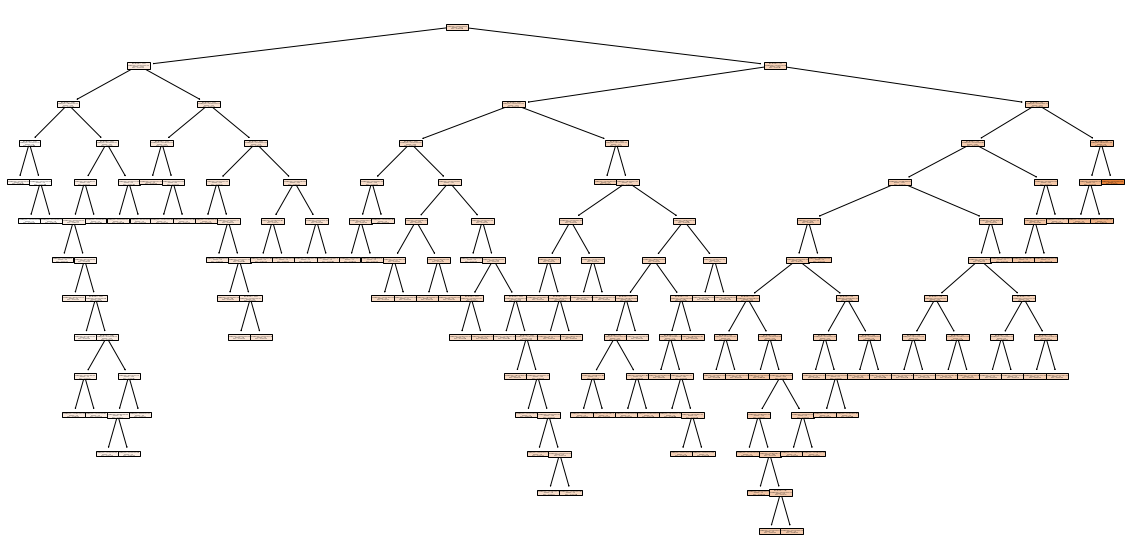

In [57]:
from sklearn import tree
plt.figure(figsize=(20,10))
graph = tree.plot_tree(regressor.estimators_[0], feature_names=['Engine Size'], filled=True)

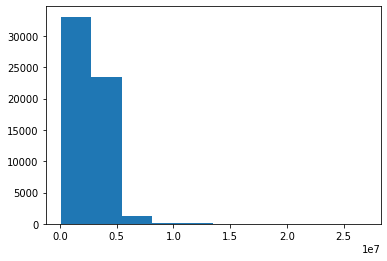

In [58]:
plt.hist(casecostprediction.unit_cost)
plt.show()

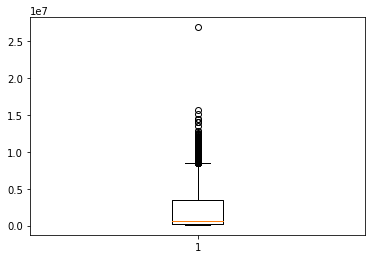

In [59]:
plt.boxplot(casecostprediction.unit_cost)
plt.show()

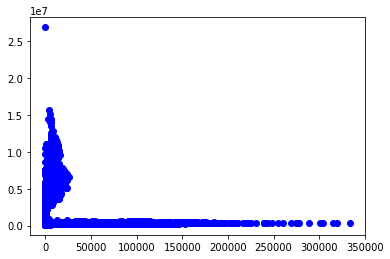

In [60]:
plt.scatter(x=casecostprediction.case,y=casecostprediction.unit_cost,color='blue')
plt.show()

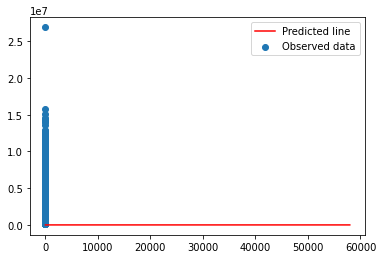

In [61]:
# Regression Line
plt.scatter(np.log(casecostprediction.case), casecostprediction.unit_cost)
plt.plot(np.log(casecostprediction.case), "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

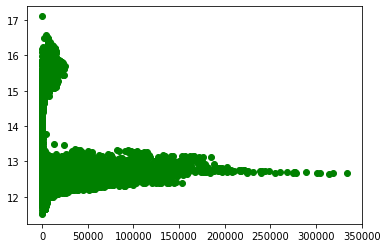

In [62]:
#exponential transformation
plt.scatter(x=casecostprediction.case,y=np.log(casecostprediction.unit_cost),color='green')

In [63]:
np.corrcoef(casecostprediction.case,casecostprediction.unit_cost)

array([[ 1.        , -0.21865572],
       [-0.21865572,  1.        ]])

In [64]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
x1=sm.add_constant(X)
regressor_OLS=sm.OLS(Y,x1).fit()

In [65]:
model = smf.ols('case ~ unit_cost',data=casecostprediction).fit()

In [66]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   case   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     2911.
Date:                Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:38:01   Log-Likelihood:            -6.4757e+05
No. Observations:               57971   AIC:                         1.295e+06
Df Residuals:                   57969   BIC:                         1.295e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.054e+04    102.852    102.434      0.000    1.03e+04    1.07e+04
unit_cost     -0.0020   3.78e-05    -53.951      0.000      -0.002      -0.002
==============================================================================
Omnibus:                    67195.522   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7318488.313
Skew:                           6.167   Prob(JB):                         0.00
Kurtosis:                      56.645   Cond. No.                     3.92e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Evaluation

In [67]:
import sklearn.metrics as metrics

In [68]:
from sklearn.preprocessing import StandardScaler  #normalizing the values 
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [69]:
from sklearn.model_selection import train_test_split  #splitting the values into train & test
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.3)

In [70]:
from sklearn.metrics import r2_score  #choosing the models kpis
from sklearn.metrics import mean_absolute_error

In [71]:
from sklearn.ensemble import RandomForestRegressor
Forest_regressor=RandomForestRegressor()
Forest_regressor.fit(X_train,Y_train)
Forest_predictions=Forest_regressor.predict(X_test)

<ipython-input-71-5357ecbcc11d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Forest_regressor.fit(X_train,Y_train)


In [72]:
r2_score_Forest=r2_score(Y_test,Forest_predictions)
MAE_forest=mean_absolute_error(Y_test,Forest_predictions)
print('For the Random Forest Model \n The r_squared={} \n The Mean squared error={}'.format(r2_score_Forest,MAE_forest))

For the Random Forest Model 
 The r_squared=0.018079127946538875 
 The Mean squared error=282036.1723164108


In [73]:
#Calculate the mean absolute percentage error
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
    return mape

In [74]:
clf = RandomForestRegressor()
 
clf.fit(X_train, Y_train)

pred = clf.predict(X_test)

# calculate MAE, MSE, RMSE
print("MAE")
print(metrics.mean_absolute_error(Y_test, pred))
print("MSE")
print(metrics.mean_squared_error(Y_test, pred))
print("RMSE")
print(np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print("MAPE")
print(metrics.mean_absolute_percentage_error(Y_test, pred))

<ipython-input-74-35b318302fa7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)


MAE
282075.64249265793
MSE
168673377277.5687
RMSE
410698.645332035
MAPE
4.162977079071182


# Deployment